# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [57]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np


---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [58]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    ### your implementation for bubble sort goes here 
    #items_to_sort is the list which you have to sort
    #list im sorting is self.items
    
    def get_sorted(self):
        
        leng = len(self.items)
        
        for i in range(1,leng):
            for j in range(0,leng - i):
                if self.items[j] > self.items[j+1]:
                    temp = self.items[j]
                    self.items[j] = self.items[j+1]
                    self.items[j+1] = temp
            self.sorted_items = self.items
            
        return self.sorted_items
    
#test
list = []

for i in range (5,10):
    list.append(random.randint(0,100))

l = BubbleSort(list)
print(list)
l2 = l.get_sorted()
print(l2)


[77, 69, 69, 17, 18]
[17, 18, 69, 69, 77]


In [59]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here 
        
    def get_sorted(self):
        #self.sorted_items = self.items
        for i in range (1,len(self.items)):
            prev = i-1
            curr = i

            while self.items[prev] > self.items[curr]:
                #swap
                temp = self.items[curr]
                self.items[curr] = self.items[prev]
                self.items[prev] = temp

                curr = prev
                if prev > 0:
                    prev = curr -1
            
           
    
        self.sorted_items = self.items
        return self.sorted_items
    

#test
list1 = []

for i in range (5,10):
    list1.append(random.randint(0,100))

l = InsertionSort(list1)
print(list1)
l2 = l.get_sorted()
print(l2)

[4, 85, 48, 17, 23]
[4, 17, 23, 48, 85]


In [60]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]
#
    def get_sorted(self):
        for i in range(len(self.items)-1):
            min_index = i
            for j in range(i+1, len(self.items)):
                if self.items[j] < self.items[min_index]:
                    min_index = j
            if i != min_index:
                temp = self.items[i]
                self.items[i] = self.items[min_index]
                self.items[min_index] = temp
            self.sorted_items = self.items

    #def get_sorted(self):
        return self.sorted_items
    
#test
list = []

for i in range (5,10):
    list.append(random.randint(0,100))

l = SelectionSort(list)
print(list)
l2 = l.get_sorted()
print(l2)

[61, 70, 38, 95, 35]
[35, 38, 61, 70, 95]


___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [61]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [62]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)  
    #plt.yscale("log")
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

[24, 78, 89, 58, 39, 5, 19, 18, 78, 78, 17, 43, 77, 0, 3, 42, 82, 26, 45, 44, 3, 93, 14, 82, 7, 20, 85, 20, 70, 99, 86, 9, 20, 67, 73, 93, 92, 73, 46, 66, 24, 66, 39, 59, 23, 79, 45, 63, 97, 51, 61, 95, 100, 9, 46, 18, 28, 49, 15, 46, 58, 18, 10, 100, 33, 100, 18, 79, 6, 10, 9, 94, 11, 27, 5, 24, 77]
[0, 3, 3, 5, 5, 6, 7, 9, 9, 9, 10, 10, 11, 14, 15, 17, 18, 18, 18, 18, 19, 20, 20, 20, 23, 24, 24, 24, 26, 27, 28, 33, 39, 39, 42, 43, 44, 45, 45, 46, 46, 46, 49, 51, 58, 58, 59, 61, 63, 66, 66, 67, 70, 73, 73, 77, 77, 78, 78, 78, 79, 79, 82, 82, 85, 86, 89, 92, 93, 93, 94, 95, 97, 99, 100, 100, 100]


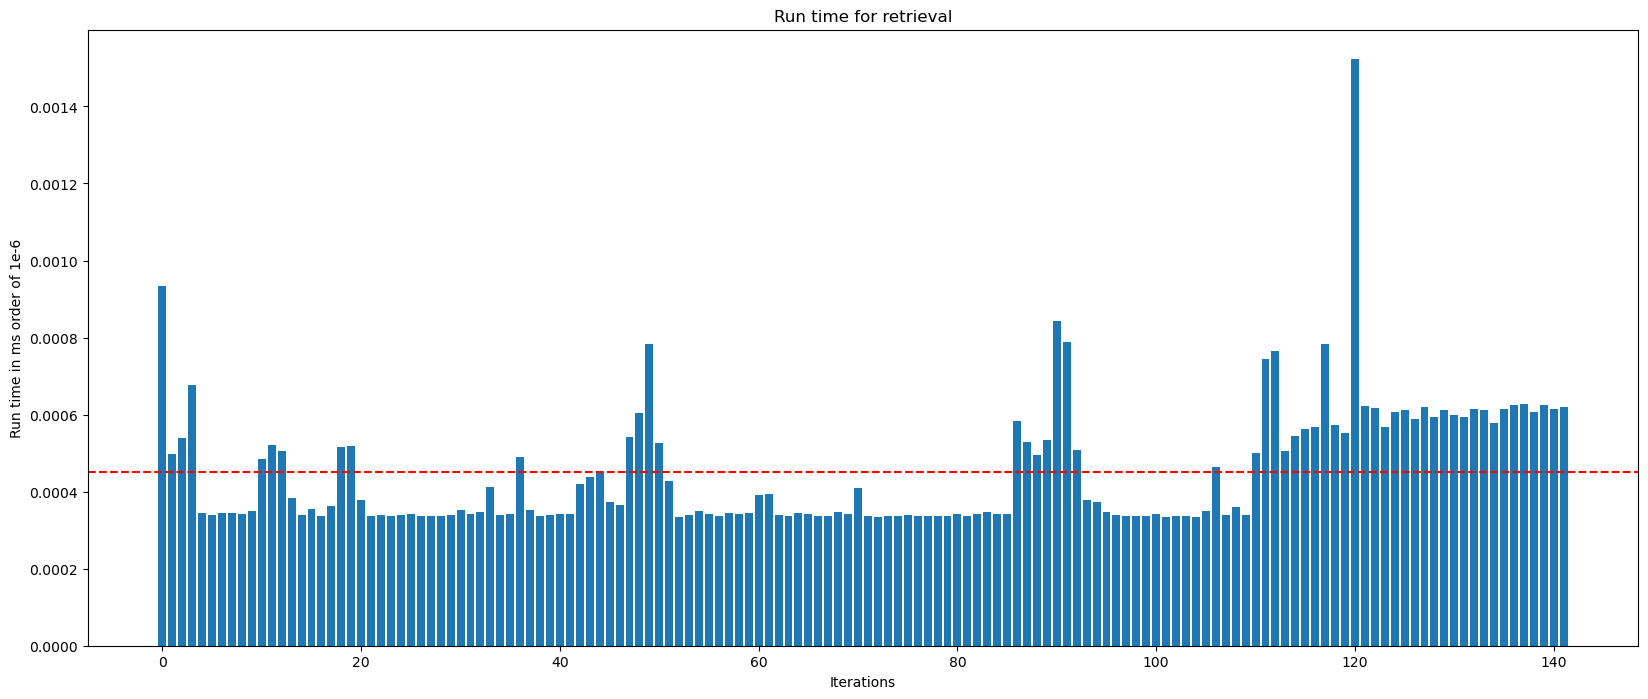

In [63]:
### Bubble sort experiment code goes here
runs = random.randint(76,500)
run_times = []
l = create_custom_list(77,100)
print(l)
for i in range(runs):
    list = BubbleSort(l)
    start = timeit.default_timer()
    found = list.get_sorted()
    stop = timeit.default_timer()
    run_times.append(stop-start)
print(found)
draw_plot(run_times)

[81, 52, 52, 68, 52, 44, 80, 85, 28, 57, 9, 85, 59, 82, 72, 82, 21, 8, 73, 75, 86, 41, 24, 48, 81, 33, 41, 38, 95, 86, 71, 20, 28, 47, 3, 89, 11, 16, 1, 12, 49, 51, 31, 93, 80, 70, 26, 47, 26, 52, 40, 71, 24, 93, 53, 17, 58, 80, 98, 44, 35, 55, 100, 63, 41, 35, 19, 63, 60, 22, 5, 83, 70, 60, 71, 83, 88]
[1, 3, 5, 8, 9, 11, 12, 16, 17, 19, 20, 21, 22, 24, 24, 26, 26, 28, 28, 31, 33, 35, 35, 38, 40, 41, 41, 41, 44, 44, 47, 47, 48, 49, 51, 52, 52, 52, 52, 53, 55, 57, 58, 59, 60, 60, 63, 63, 68, 70, 70, 71, 71, 71, 72, 73, 75, 80, 80, 80, 81, 81, 82, 82, 83, 83, 85, 85, 86, 86, 88, 89, 93, 93, 95, 98, 100]


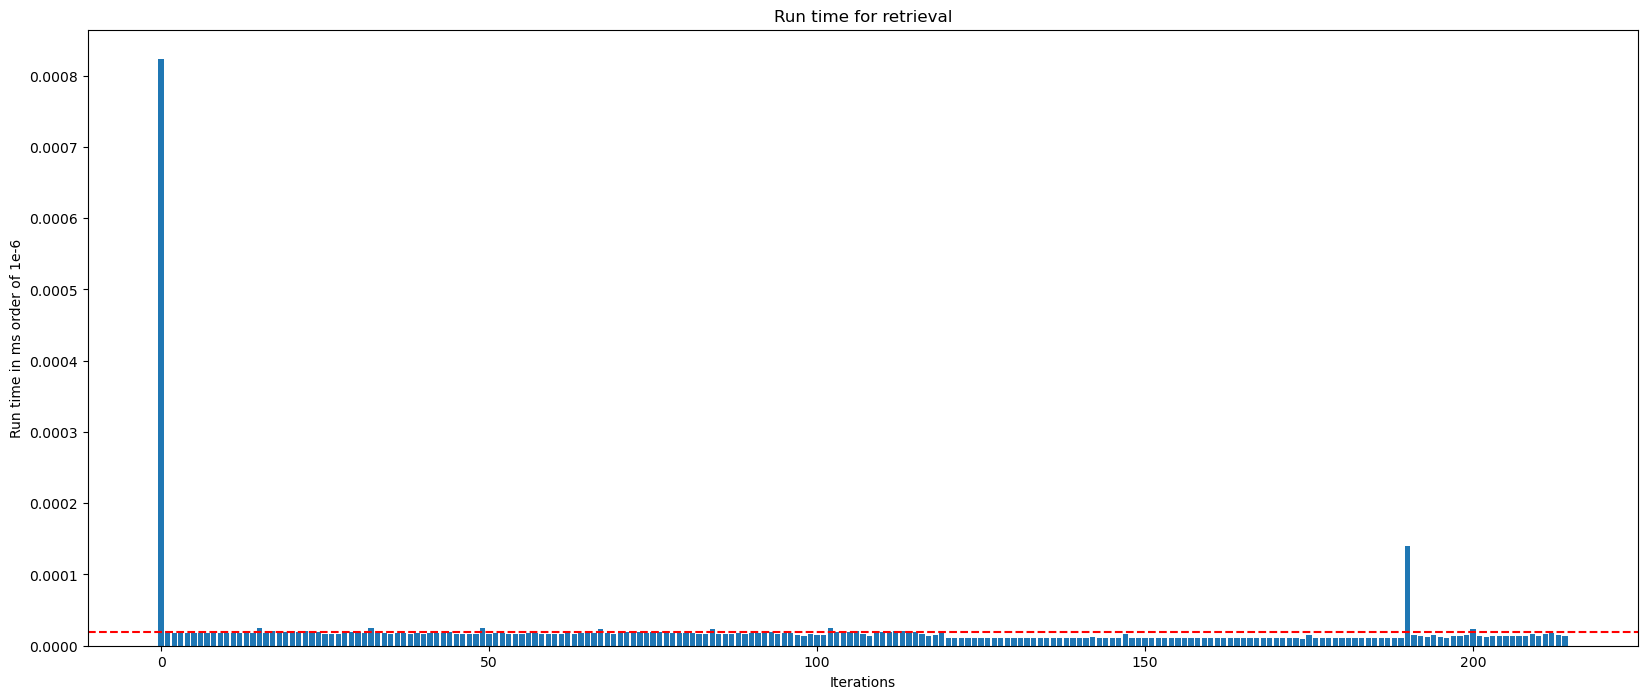

In [64]:
### Insertion sort experiment code goes here

runs = random.randint(76,500)
run_times = []
l = create_custom_list(77,100)
print(l)
for i in range(runs):
    list1 = InsertionSort(l)
    start = timeit.default_timer()
    found = list1.get_sorted()
    stop = timeit.default_timer()
    run_times.append(stop-start)
print(found)
#print(run_times)
draw_plot(run_times)

[26, 23, 14, 30, 44, 88, 10, 36, 38, 73, 5, 5, 66, 56, 77, 43, 50, 9, 95, 89, 40, 34, 75, 5, 97, 34, 57, 73, 86, 88, 25, 58, 47, 4, 58, 31, 30, 49, 42, 61, 44, 6, 61, 64, 83, 17, 31, 63, 76, 31, 94, 9, 49, 51, 33, 30, 16, 14, 49, 53, 97, 98, 49, 89, 57, 77, 96, 49, 20, 55, 27, 82, 89, 42, 20, 34, 60]
[4, 5, 5, 5, 6, 9, 9, 10, 14, 14, 16, 17, 20, 20, 23, 25, 26, 27, 30, 30, 30, 31, 31, 31, 33, 34, 34, 34, 36, 38, 40, 42, 42, 43, 44, 44, 47, 49, 49, 49, 49, 49, 50, 51, 53, 55, 56, 57, 57, 58, 58, 60, 61, 61, 63, 64, 66, 73, 73, 75, 76, 77, 77, 82, 83, 86, 88, 88, 89, 89, 89, 94, 95, 96, 97, 97, 98]


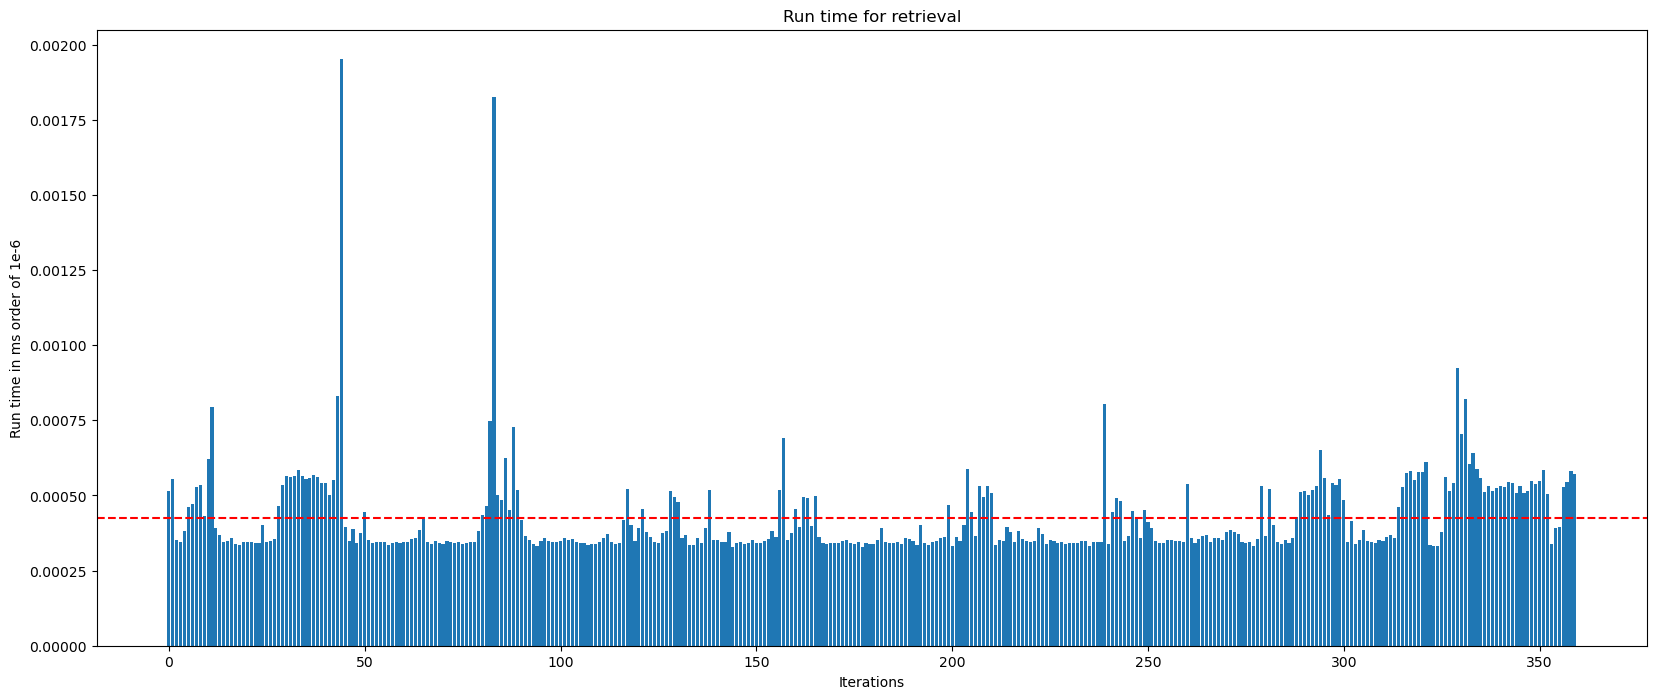

In [65]:
### Selection sort experiment code goes here

runs = random.randint(76,500)
run_times = []
l = create_custom_list(77,100)
print(l)
for i in range(runs):
    list1 = SelectionSort(l)
    start = timeit.default_timer()
    found = list1.get_sorted()
    stop = timeit.default_timer()
    run_times.append(stop-start)
print(found)
#print(run_times)
draw_plot(run_times)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [66]:
def line_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.plot(x,run_arr)
   # plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

#print(np.arange(0,10,1))



times= [4.719998833024874e-07, 0.0027096100001654123, 0.01055007599927194, 0.02231906999964849, 0.04008691599970916]


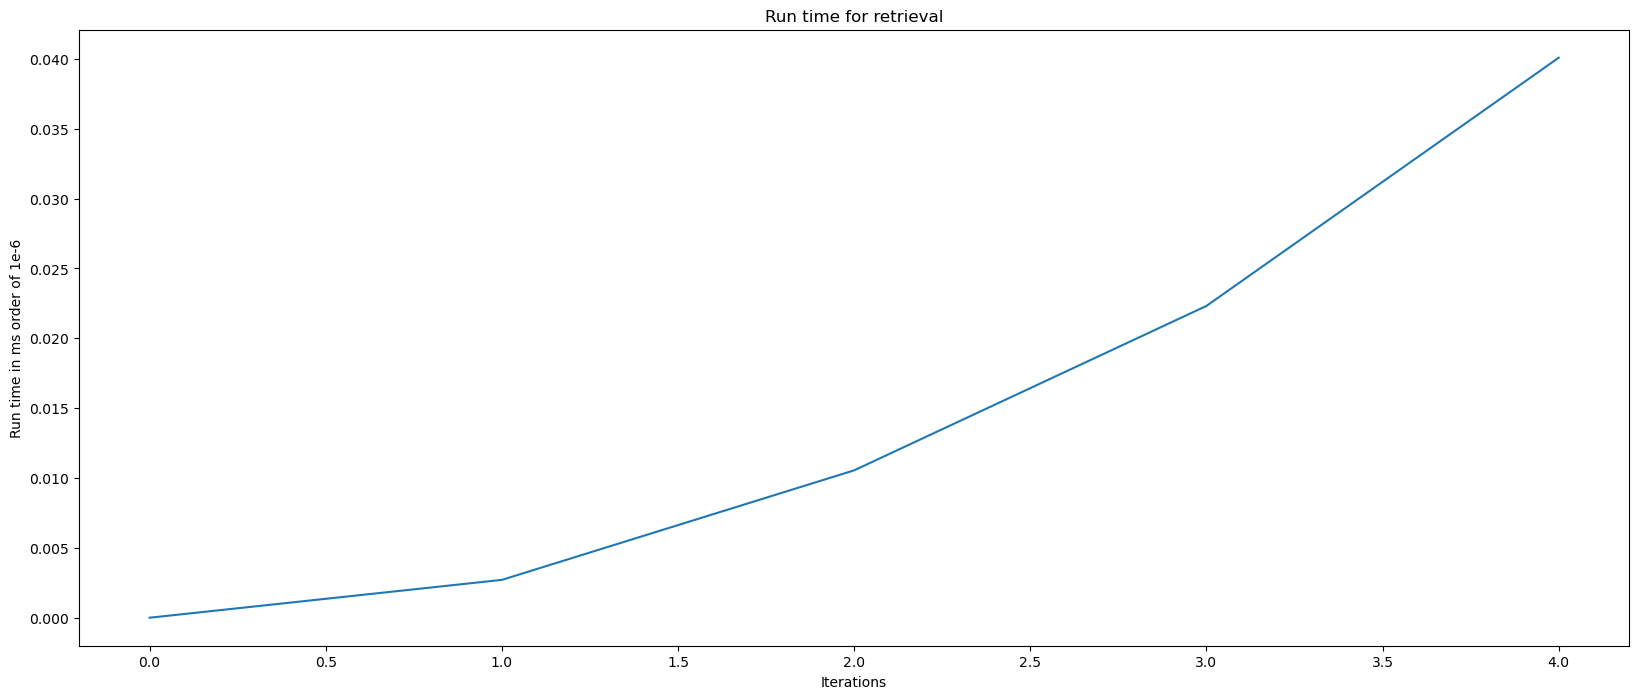

In [67]:
### Bubble sort experiment code goes here
runs = 50
run_times = []

#print(l)
for i in range(1,1000,200):
    l = create_custom_list(i,100)
    avg =0 
    #find avg for each length of list
    for j in range(runs):
        insertion = BubbleSort(l)
        start = timeit.default_timer()
        insertion.get_sorted()
        stop = timeit.default_timer()
        avg += (stop-start)
    run_times.append(avg / runs)
print("times=",run_times)
line_plot(run_times)

times= [5.319999036146327e-07, 0.00010678999999072403, 0.0003736259999277536, 0.0008674500000051921, 0.0013180999999167398]


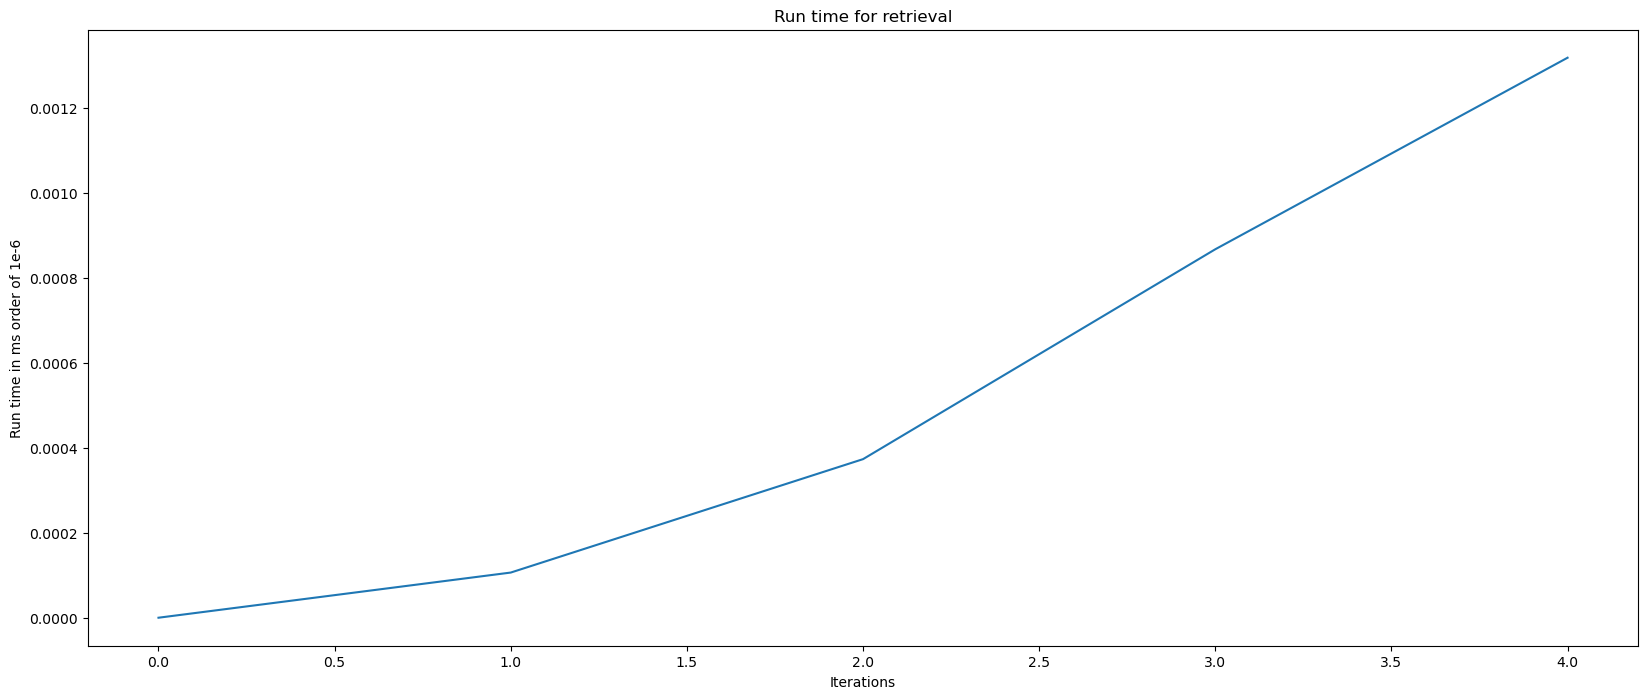

In [68]:
### Insertion sort experiment code goes here
runs = 50
run_times = []

#print(l)
for i in range(1,1000,200): #MUST BE CHANGED TO 10,000 ##
    l = create_custom_list(i,100)
    avg =0 
    #find avg for each length of list
    for j in range(runs):
        insertion = InsertionSort(l)
        start = timeit.default_timer()
        insertion.get_sorted()
        stop = timeit.default_timer()
        avg += (stop-start)
    run_times.append(avg / runs)
print("times=",run_times)
line_plot(run_times)

times= [4.939999780617654e-07, 0.002728315999629558, 0.010000577999890084, 0.02342986200026644, 0.04214362399958191]


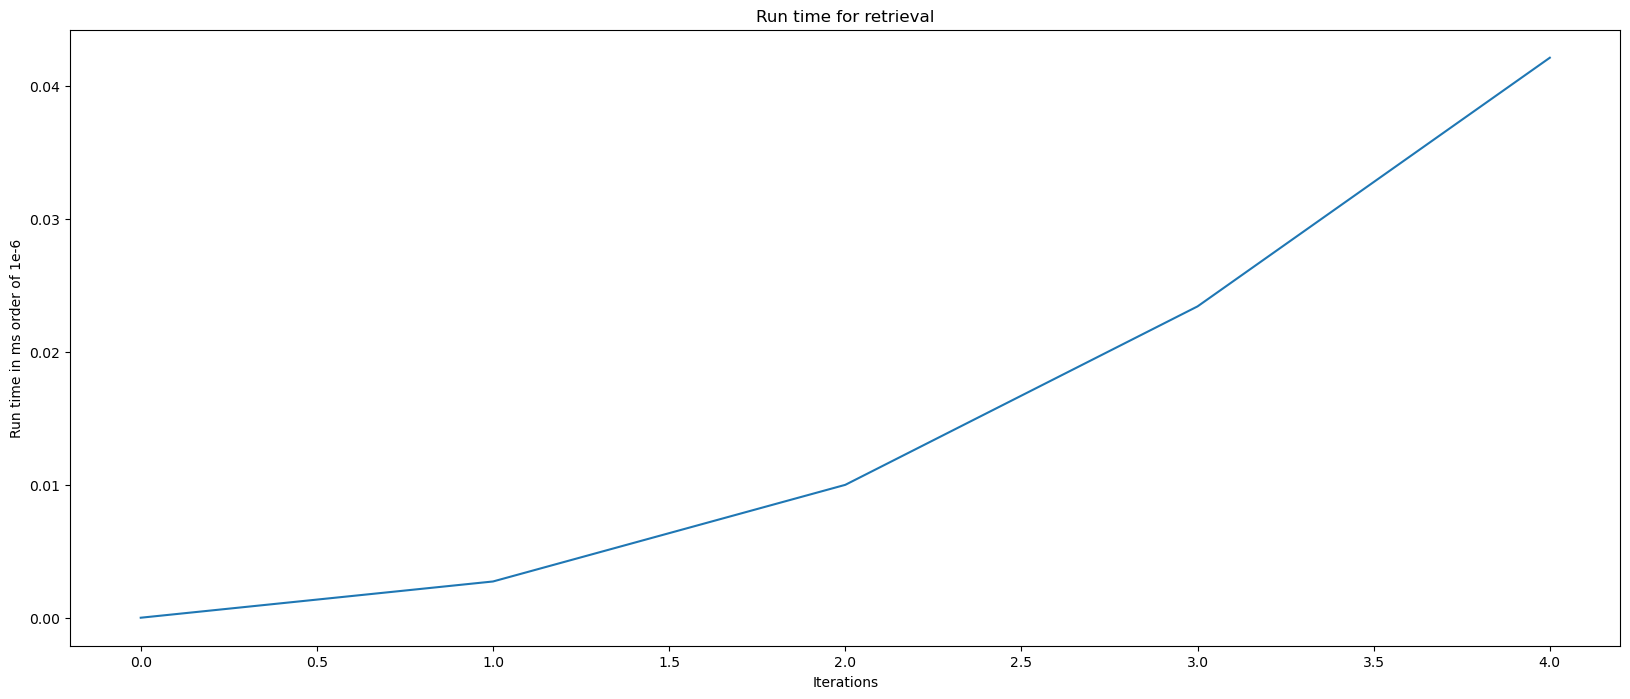

In [69]:
### Selection sort experiment code goes here
runs = 50
run_times = []

#print(l)
for i in range(1,1000,200):
    l = create_custom_list(i,100)
    avg =0 
    #find avg for each length of list
    for j in range(runs):
        selection = SelectionSort(l)
        start = timeit.default_timer()
        selection.get_sorted()
        stop = timeit.default_timer()
        avg += (stop-start)
    run_times.append(avg / runs)
print("times=",run_times)
line_plot(run_times)

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [70]:
#partially sort a list  using quick sort

#think of k as degree of unsortedness, 1/4 or 1/5 of the list seems to be go to fordesired unsortedness

#k is supposed to be the length at which it stops recursing which is why it is in the base case, 
#implying it wont be fully sorted by k length for the sub lists

def quick_sort(my_list, k=None):
    
    if k == None:
        k = 1

    #error handling?
    if k > len(my_list):
        k = 1
     

   # if start == None:
    start = 0
    #if end == None:
    end = len(my_list)
    

    if len(my_list) == 0 or len(my_list) == 1:
   # if end-start < k:    
        return my_list   
   

    

    

    pivot = my_list[end//2]

    #move pivot to begining 
    t = my_list[0]
    my_list[0] = my_list[end//2]

    my_list[end//2] = t

    #print("swap", my_list)
    #print("p ", pivot)


    #lowest from left
    left = []
    #highest from the right
    right = []

    #find stuff less than pivot add to left
    for i in range (1, end):

        if my_list[i] < pivot:
            left.append(my_list[i])

    #find stuff greater than pivot add to right
    for j in range (1, end):

        if my_list[j] >= pivot:
            right.append(my_list[j])


    #pivot not has a spot in list
    new_list = quick_sort(left) + [pivot] + quick_sort(right)
    #print("n= ",left)
    final = left + [pivot] + right

    #end recursion when sublists are < k
    if len(left) < k or len(right) < k:
        return final
    else:
        return new_list


    
    
    



In [71]:
#declare global DELCLARE GOABALLL
#global near_sorted_list
#global unsorted_list

#create near and unsorted lists 
near_sorted_list = create_custom_list(1000,100)
near_sorted_list = quick_sort(near_sorted_list,150)

unsorted_list = create_custom_list(1000,100)

#determine number of runs
#global runs_a4
runs_a4 = random.randint(75,100)

#a = create_custom_list(10,100)
#b = a[:]
#print(a)
#print(quick_sort(a))
#print(b)

In [72]:
### Bubble sort experiment code goes here

unsorted_list2 = unsorted_list[:]
near_sorted_list2 = near_sorted_list[:]

run_times1 = []
run_times2 = []

#near sorted list

print("near sorted list testing")
print(near_sorted_list2)
for i in range(runs_a4):
    bubblesort1 = BubbleSort(near_sorted_list2)
    start_near = timeit.default_timer()
    num_near = bubblesort1.get_sorted()
    stop_near = timeit.default_timer()
    run_times1.append(stop_near-start_near)

#draw_plot(run_times1)

#unsorted list

print("unsorted list testing")
print(unsorted_list2)
for j in range(runs_a4):
    bubblesort2 = BubbleSort(unsorted_list2)
    start_un = timeit.default_timer()
    num_un = bubblesort2.get_sorted()
    stop_un = timeit.default_timer()
    run_times2.append(stop_un-start_un)

#draw_plot(run_times2)

bubble_avg1 = sum(run_times1)/runs_a4
bubble_avg2 = sum(run_times2)/runs_a4


near sorted list testing
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 7, 10, 8, 6, 3, 2, 8, 3, 3, 11, 9, 11, 8, 6, 2, 5, 11, 4, 2, 10, 11, 7, 5, 8, 2, 8, 5, 4, 6, 8, 10, 6, 6, 6, 11, 8, 3, 6, 2, 10, 5, 9, 10, 4, 9, 3, 8, 10, 8, 5, 5, 4, 9, 9, 2, 5, 10, 4, 8, 8, 6, 4, 2, 3, 8, 11, 2, 2, 4, 7, 10, 10, 4, 8, 2, 2, 5, 4, 9, 7, 2, 9, 6, 10, 3, 2, 7, 5, 7, 6, 10, 9, 8, 2, 3, 10, 10, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 13, 13, 14, 14, 13, 13, 14, 14, 14, 14, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27,

In [73]:
### Selection sort experiment code goes here
#global near_sorted
unsorted_list2 = unsorted_list[:]
near_sorted_list2 = near_sorted_list[:]

run_times1= []
run_times2= []
#l = create_custom_list(77,100)
print("NEAR SORTED")
print(near_sorted_list2)

for i in range(runs_a4):
    list2 = SelectionSort(near_sorted_list2)
    start = timeit.default_timer()
    found = list2.get_sorted()
    stop = timeit.default_timer()
    run_times1.append(stop-start)

#draw_plot(run_times1)

print("UNSORTED")
print(unsorted_list2)

for j in range(runs_a4):
    list3 = SelectionSort(unsorted_list2)
    start = timeit.default_timer()
    found2 = list3.get_sorted()
    stop = timeit.default_timer()
    run_times2.append(stop-start)


#draw_plot(run_times2)

selection_avg1 = sum(run_times1)/runs_a4
selection_avg2 = sum(run_times2)/runs_a4

NEAR SORTED
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 7, 10, 8, 6, 3, 2, 8, 3, 3, 11, 9, 11, 8, 6, 2, 5, 11, 4, 2, 10, 11, 7, 5, 8, 2, 8, 5, 4, 6, 8, 10, 6, 6, 6, 11, 8, 3, 6, 2, 10, 5, 9, 10, 4, 9, 3, 8, 10, 8, 5, 5, 4, 9, 9, 2, 5, 10, 4, 8, 8, 6, 4, 2, 3, 8, 11, 2, 2, 4, 7, 10, 10, 4, 8, 2, 2, 5, 4, 9, 7, 2, 9, 6, 10, 3, 2, 7, 5, 7, 6, 10, 9, 8, 2, 3, 10, 10, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 13, 13, 14, 14, 13, 13, 14, 14, 14, 14, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 

In [74]:
### Insertion sort experiment code goes here
unsorted_list2 = unsorted_list[:]
near_sorted_list2 = near_sorted_list[:]

run_times1= []
run_times2= []
#l = create_custom_list(77,100)
print("NEAR SORTED")
print(near_sorted_list2)

for i in range(runs_a4):
    list2 = InsertionSort(near_sorted_list2)
    start = timeit.default_timer()
    found = list2.get_sorted()
    stop = timeit.default_timer()
    run_times1.append(stop-start)

#draw_plot(run_times1)

print("UNSORTED")
print(unsorted_list2)

for j in range(runs_a4):
    list3 = InsertionSort(unsorted_list2)
    start2 = timeit.default_timer()
    found2 = list3.get_sorted()
    stop2 = timeit.default_timer()
    run_times2.append(stop2-start2)


#draw_plot(run_times2)

insertion_avg1 = sum(run_times1)/runs_a4
insertion_avg2 = sum(run_times2)/runs_a4

NEAR SORTED
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 7, 10, 8, 6, 3, 2, 8, 3, 3, 11, 9, 11, 8, 6, 2, 5, 11, 4, 2, 10, 11, 7, 5, 8, 2, 8, 5, 4, 6, 8, 10, 6, 6, 6, 11, 8, 3, 6, 2, 10, 5, 9, 10, 4, 9, 3, 8, 10, 8, 5, 5, 4, 9, 9, 2, 5, 10, 4, 8, 8, 6, 4, 2, 3, 8, 11, 2, 2, 4, 7, 10, 10, 4, 8, 2, 2, 5, 4, 9, 7, 2, 9, 6, 10, 3, 2, 7, 5, 7, 6, 10, 9, 8, 2, 3, 10, 10, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 13, 13, 14, 14, 13, 13, 14, 14, 14, 14, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 

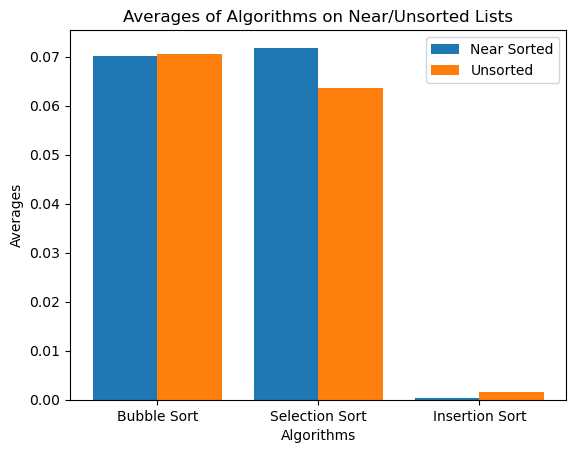

In [75]:
#draw bar graph

X = ['Bubble Sort','Selection Sort','Insertion Sort'] 
r1 = [bubble_avg1,selection_avg1,insertion_avg1] 
r2 = [bubble_avg2,selection_avg2,insertion_avg2] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, r1, 0.4, label = 'Near Sorted') 
plt.bar(X_axis + 0.2, r2, 0.4, label = 'Unsorted') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Algorithms") 
plt.ylabel("Averages") 
plt.title("Averages of Algorithms on Near/Unsorted Lists") 
plt.legend() 
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [76]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [77]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [78]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [79]:
### create even and odd list ###

def even_odd_lists():
    length = random.randint(1000,5000)

    if (length % 2) == 0:
        even = create_custom_list(length,100)
        odd = create_custom_list(length+1,100)
    else:
        odd = create_custom_list(length, 100)
        even = create_custom_list(length+1,100)

    e = InsertionSort(even)
    even = e.get_sorted()
    o = InsertionSort(odd)
    odd = o.get_sorted()
    return (even,odd)

EVEN
[44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

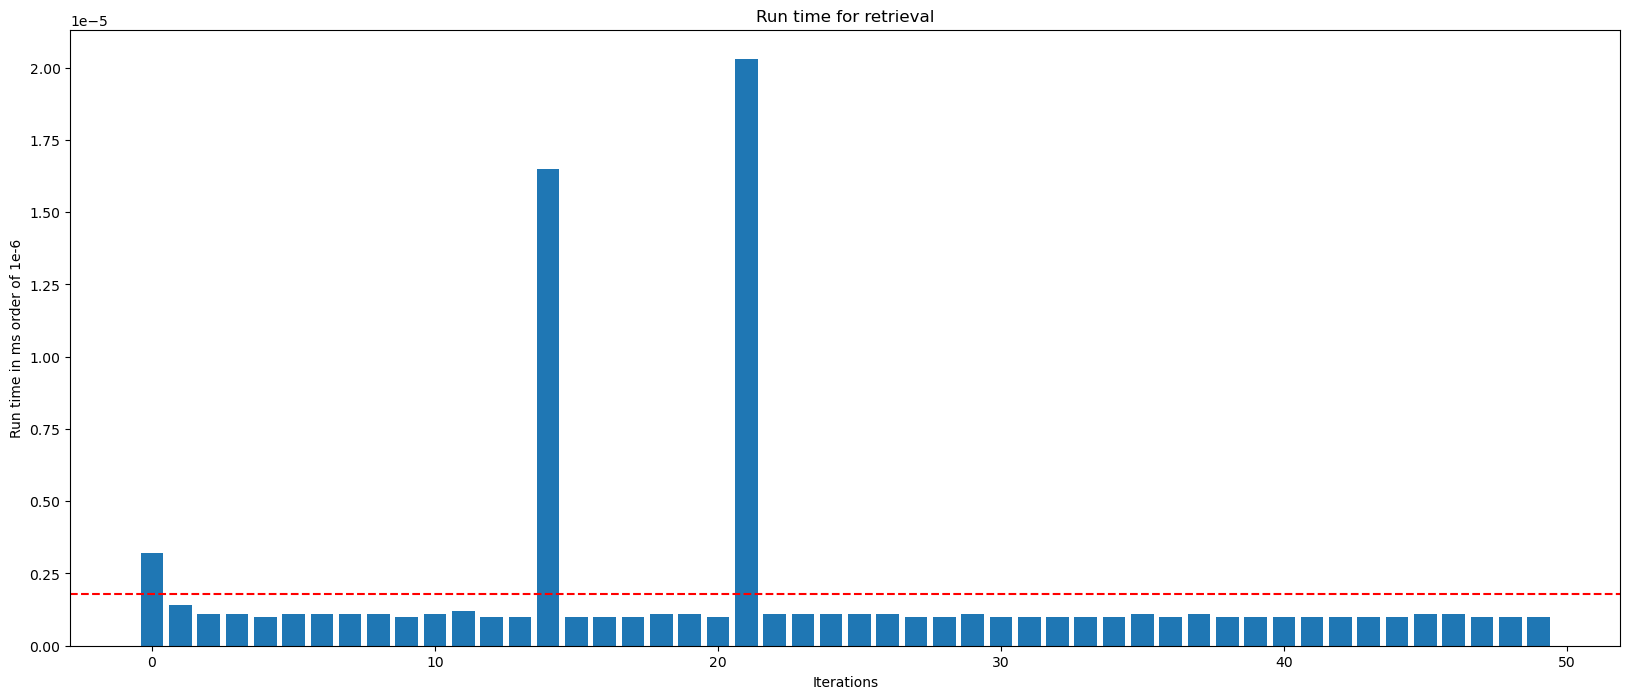

ODD
[44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

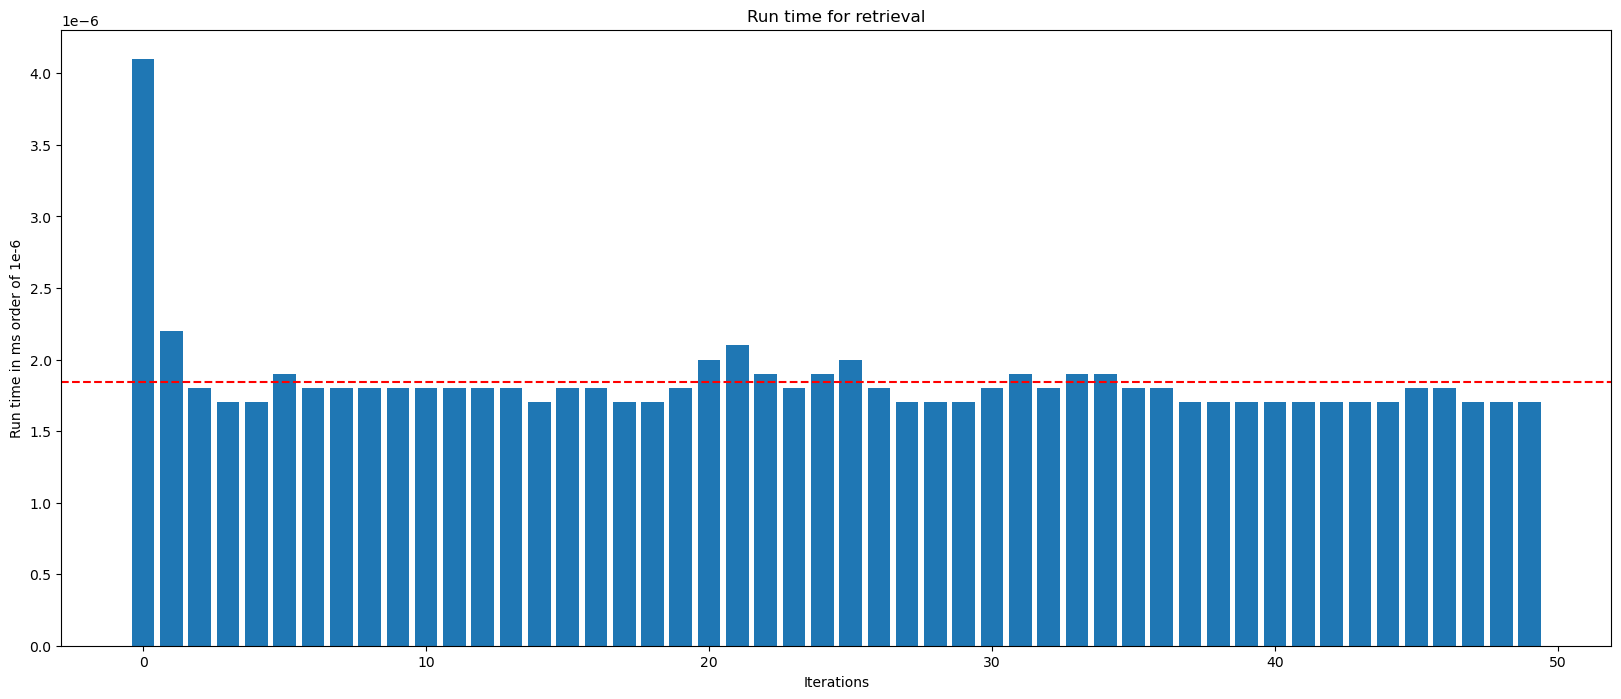

In [80]:
##--binary search 1--item at begining--## 

##place item at start


#get even and od lists

e_o = even_odd_lists()
#even_odd_lists returns a tuple (even,odd)
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at begining
even[0] = item
odd[0] = item

#expieriment
run_times1 = []
run_times2 = []


print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_1(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_1(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)



EVEN
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 1

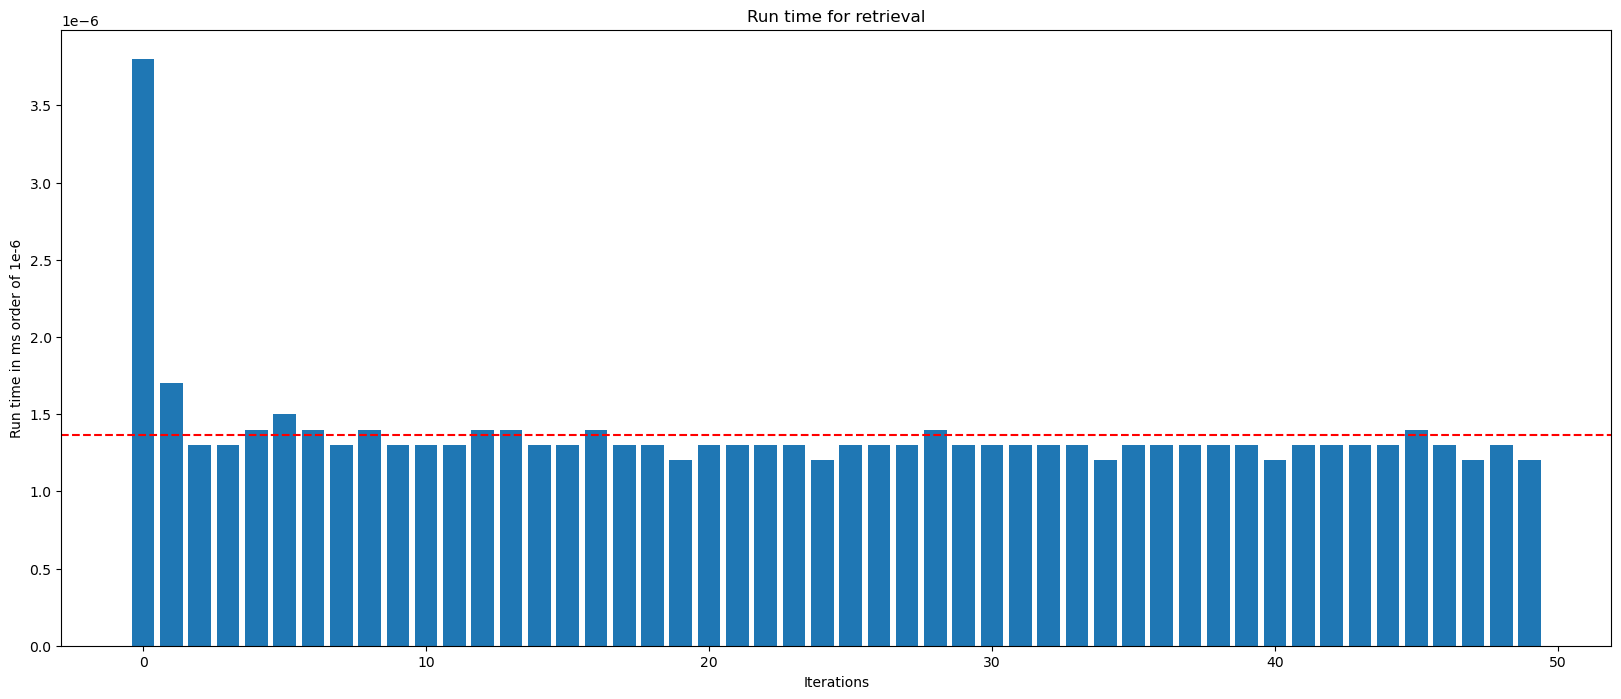

ODD
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

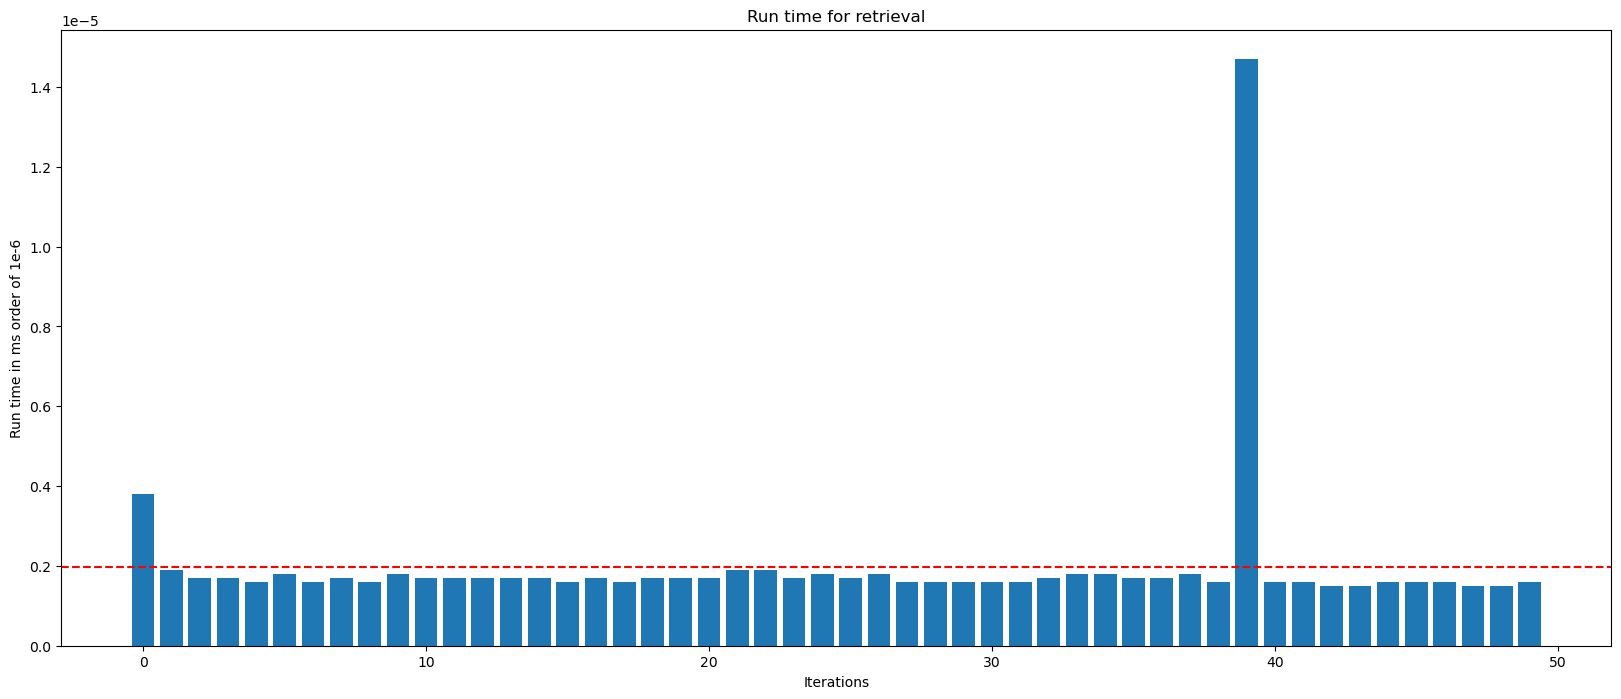

In [81]:
##--binary search 1--item at end--## 

##place item at start


#get even and od lists

e_o = even_odd_lists()
#even_odd_lists returns a tuple (even,odd)
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at end
even[(len(even))-1] = item
odd[(len(odd))-1] = item

#expieriment
run_times1 = []
run_times2 = []


print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_1(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_1(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)


25
EVEN
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

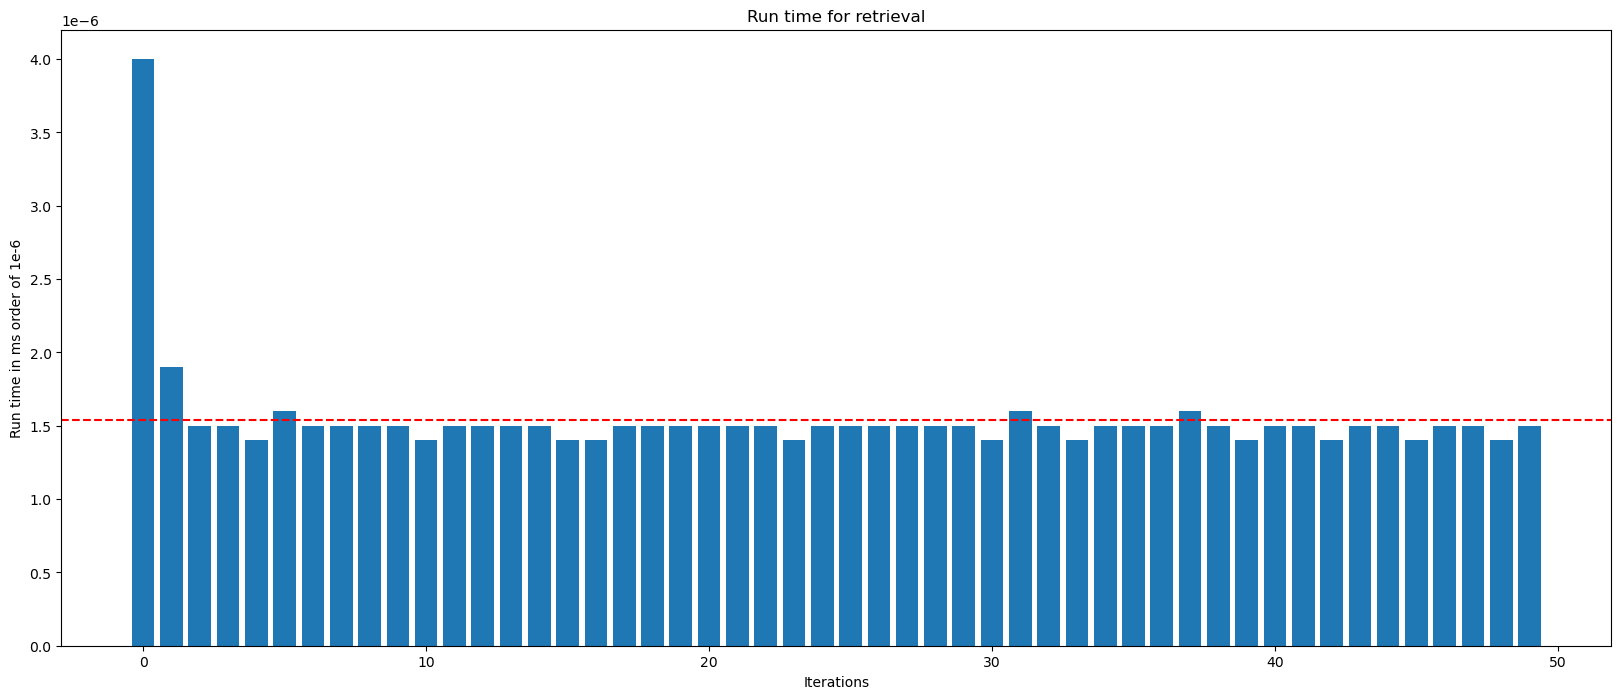

ODD
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,

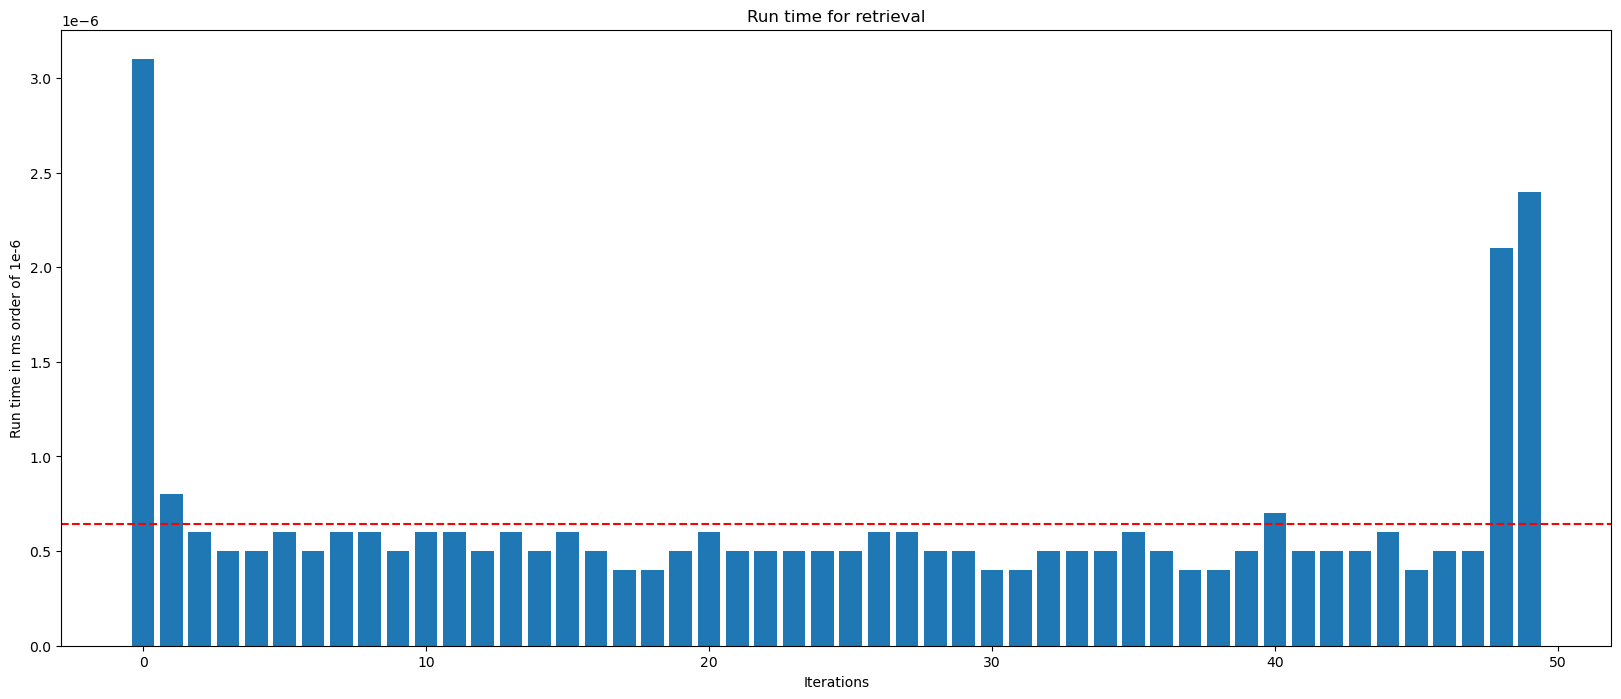

In [82]:
##--binary search 1--item in middle--## 

##place item at start


#get even and od lists

e_o = even_odd_lists()
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at end
even[(len(even))//2] = item
odd[(len(odd))//2] = item

#expieriment
run_times1 = []
run_times2 = []

print(item)
print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_1(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_1(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)


In [83]:
### create even and odd list ###

In [84]:
#BUBBLE SORT BINARY SEARCHES
#binary search at the beginning of the list

**Reflection**:

---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [85]:
def binary_search_4(item_list, to_find):
    
    #empty list doea not have item
    if len(item_list) == 0:
        return False

    mid = len(item_list) // 2
  
    item =  item_list[mid]
    
    if to_find < item:
        new = item_list[:mid]
        return binary_search_4(new,to_find)

    elif to_find > item:
        new = item_list[mid+1:]
        return binary_search_4(new,to_find)

    else:
        return True
    

    

        
    

l = [1,1,3,4,4,5,6,7,8,10,15]


print(binary_search_4(l,17))


False


Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

EVEN
[49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 

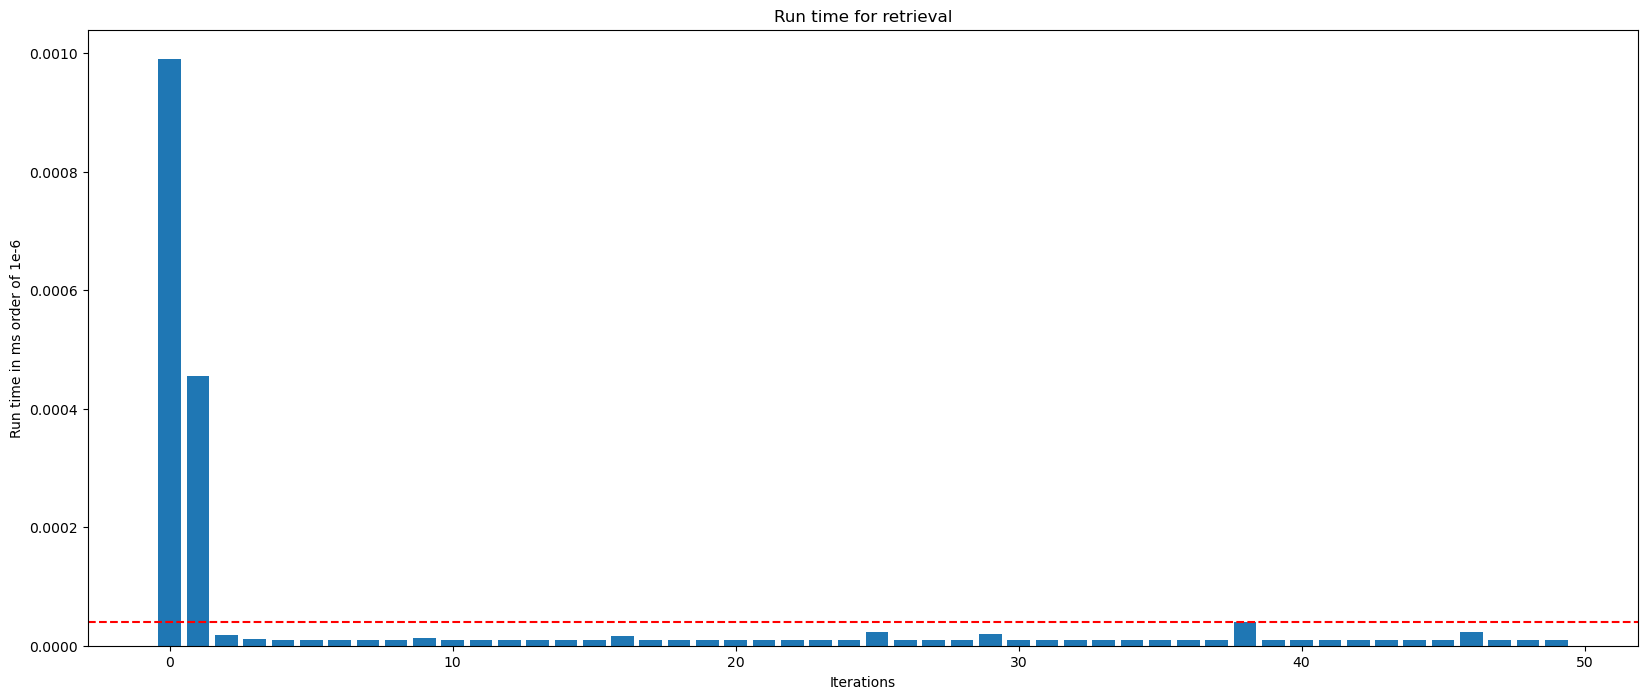

ODD
[49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

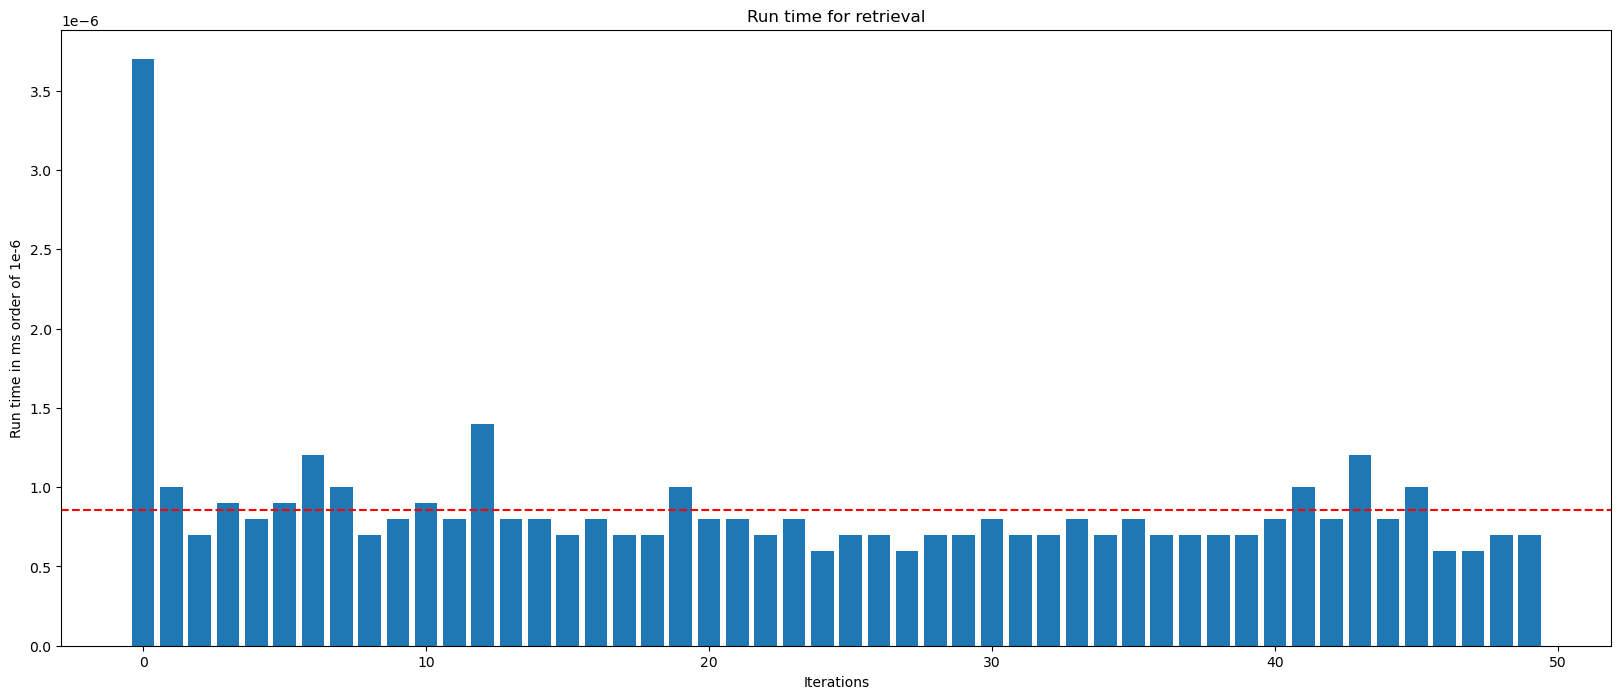

In [86]:
##--binary search 4--item at begining--## 

##place item at start


#get even and odd lists

e_o = even_odd_lists()
#even_odd_lists returns a tuple (even,odd)
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at begining
even[0] = item
odd[0] = item

#expieriment
run_times1 = []
run_times2 = []


print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_4(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_4(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)



EVEN
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8

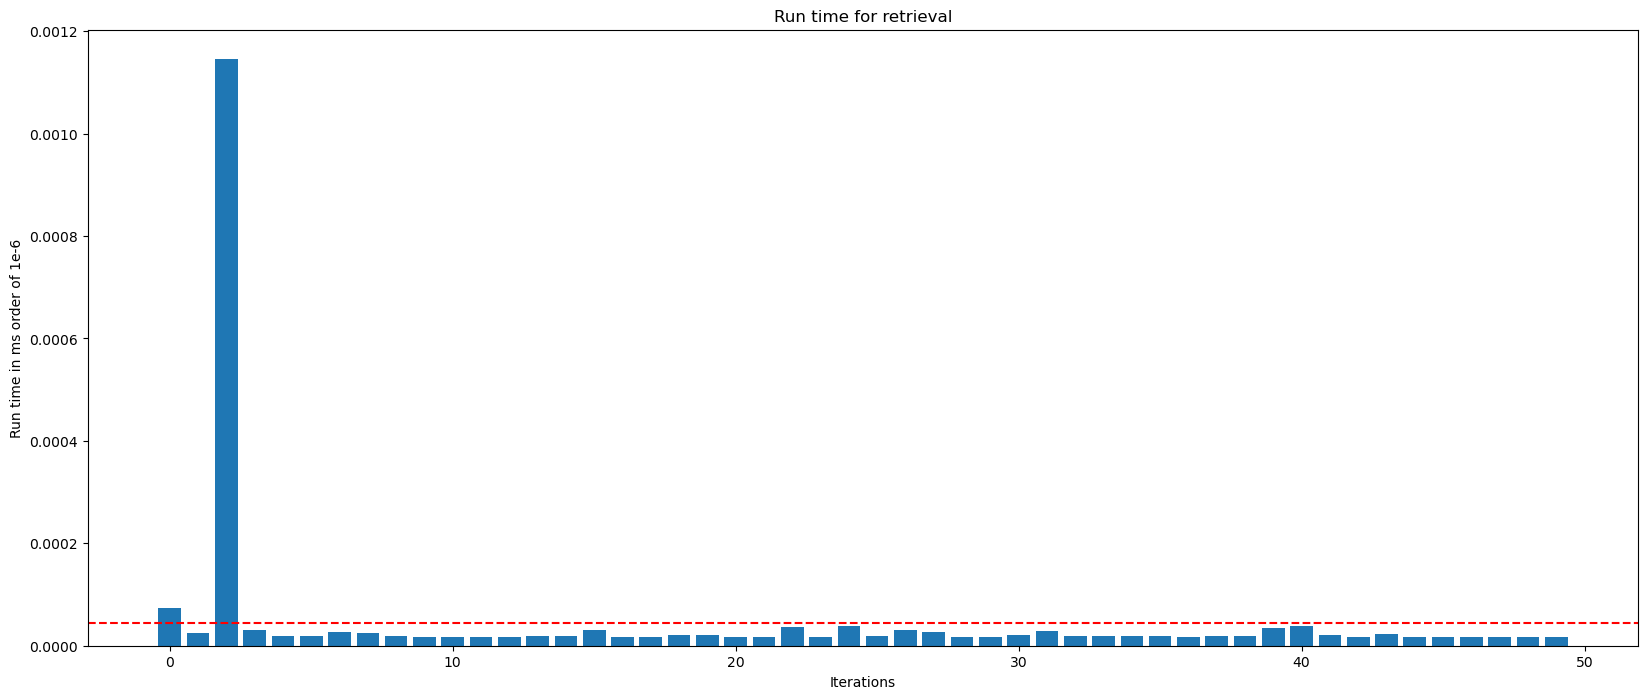

ODD
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

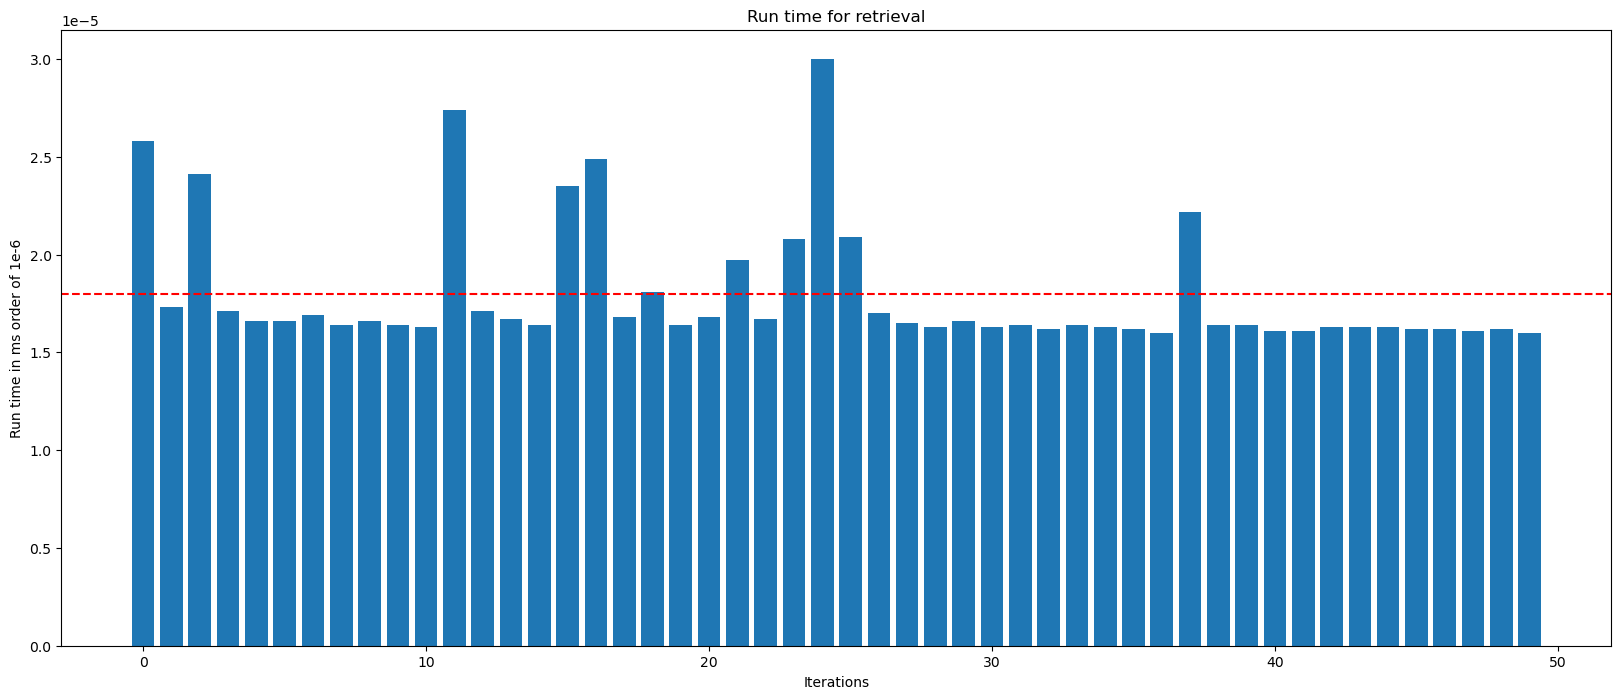

In [87]:
##--binary search 4--item at end--## 

##place item at start


#get even and od lists

e_o = even_odd_lists()
#even_odd_lists returns a tuple (even,odd)
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at end
even[(len(even))-1] = item
odd[(len(odd))-1] = item

#expieriment
run_times1 = []
run_times2 = []


print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_4(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_4(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)


49
EVEN
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

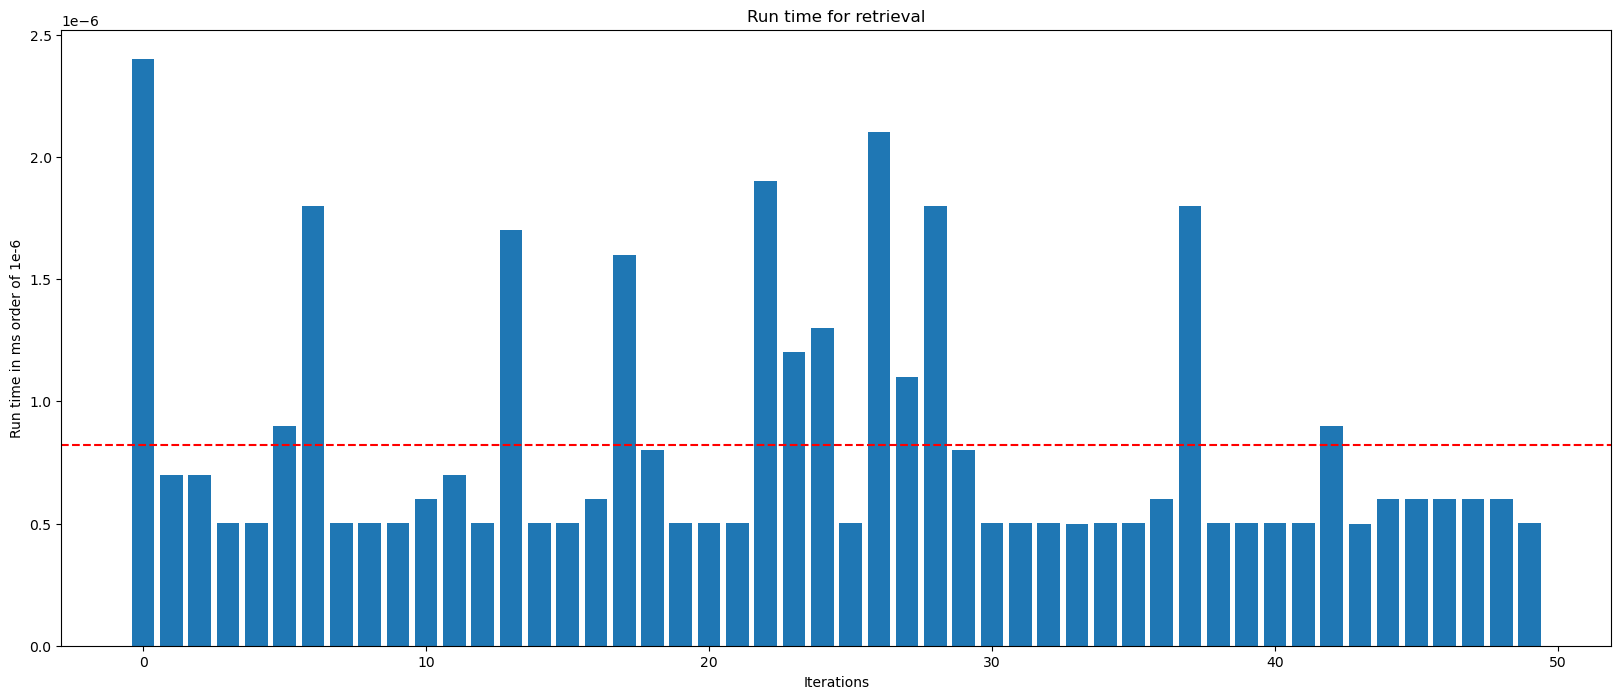

ODD
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

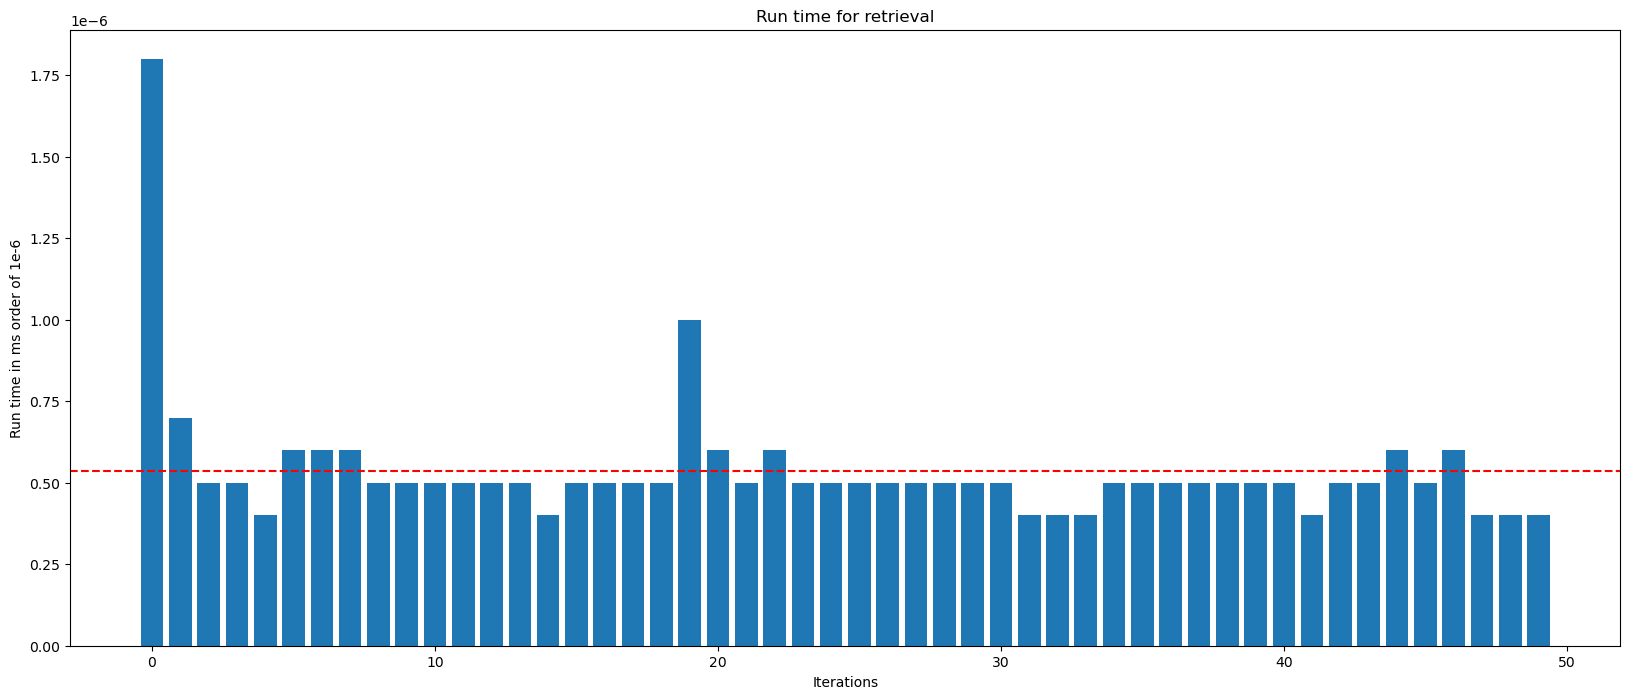

In [88]:
##--binary search 4--item in middle--## 

##place item at start


#get even and od lists

e_o = even_odd_lists()
even = e_o[0]
odd = e_o[1]

#decide item to find
item = random.randint(0,100)

#place at end
even[(len(even))//2] = item
odd[(len(odd))//2] = item

#expieriment
run_times1 = []
run_times2 = []

print(item)
print("EVEN")
print(even)

for i in range(runs):
    #list2 = InsertionSort(near_sorted)
    start = timeit.default_timer()
    binary_search_4(even,item)
    stop = timeit.default_timer()
    run_times1.append(stop-start)

draw_plot(run_times1)

print("ODD")
print(odd)

for j in range(runs):
    #list3 = InsertionSort(unsorted)
    start = timeit.default_timer()
    binary_search_4(odd,item)
    stop = timeit.default_timer()
    run_times2.append(stop-start)


draw_plot(run_times2)


In [89]:
# your implementation and experiments go here.

##### Result Discussion:

---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

In [90]:
#mergesort

def merge(l1,l2):
    
    #base case, list + empty lsit
    if len(l1) == 0:
        return l2
    
    if len(l2) == 0:
        return l1
    
    #if first element of l1 < first element l2
    if l1[0] <= l2[0]:
        
        #avoid idenx error
        if len(l1) > 1:
            sliced = l1[1:]
        else:
            sliced = []
        #put lesser object at front   
        return [l1[0]] + merge(sliced,l2)
    
    #if first element of l1 > forst element l2
    else:
        
        if len(l2) > 1:
            sliced = l2[1:]
        else:
            sliced = []
            
        #put lesser object at front      
        return [l2[0]] + merge(sliced,l1)
    
def merge_sort(l):
    
    if len(l) == 0 or len(l) == 1:
        return l
    
    else:
        l1 = l[:len(l)//2]
        l2 = l[len(l)//2:]
        
        return merge(merge_sort(l1),merge_sort(l2))
    

from random import randint

list1 = []

for i in range (15):
    n = randint(0,50)
    list1.append(n)

    
print(list1)
print(merge_sort(list1))
            
        
        

[42, 11, 44, 14, 18, 9, 28, 31, 9, 15, 10, 18, 7, 3, 2]
[2, 3, 7, 9, 9, 10, 11, 14, 15, 18, 18, 28, 31, 42, 44]


In [91]:
#partially sort a list  using quick sort

#think of k as degree of unsortedness, 1/4 or 1/5 of the list seems to be go to fordesired unsortedness

#k is supposed to be the length at which it stops recursing which is why it is in the base case, 
#implying it wont be fully sorted by k length for the sub lists

def quick_sort_2(my_list):
    
    

   # if start == None:
    start = 0
    #if end == None:
    end = len(my_list)
    

    if len(my_list) == 0 or len(my_list) == 1:
   # if end-start < k:    
        return my_list   
   

    

    

    pivot = my_list[end//2]

    #move pivot to begining 
    t = my_list[0]
    my_list[0] = my_list[end//2]

    my_list[end//2] = t

    #print("swap", my_list)
    #print("p ", pivot)


    #lowest from left
    left = []
    #highest from the right
    right = []

    #find stuff less than pivot add to left
    for i in range (1, end):

        if my_list[i] < pivot:
            left.append(my_list[i])

    #find stuff greater than pivot add to right
    for j in range (1, end):

        if my_list[j] >= pivot:
            right.append(my_list[j])


    #pivot not has a spot in list
    new_list = quick_sort(left) + [pivot] + quick_sort(right)
    #print("n= ",left)
    

    #end recursion when sublists are < k
    if len(left) == 0 or len(right) == 1:
        
        return new_list


    
    
    
l2 = create_custom_list(20,100)

print(quick_sort_2(l2))


None


In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

In [92]:
# your implementation and experiments go here.

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [93]:
## your implementation and code goes here

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

In [94]:
## your implementation and code goes here

**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

---
---